<h1><font color = 'darkblue',size =12><center>BANK MARKETING CAMPAIGN</font></h1>

_Runa Veigas_<br>
<right>runaveigas@gmail.com</right><br>

<h2><font color = 'green'>Objective</font></h2>

The classification goal is to predict if the client will subscribe a term deposit (variable y).


<h2><font color = 'green'><CENTER>INPUT VARIABLES</font></h2>

### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
<br>8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('bank-full.csv',sep = ';')


<IPython.core.display.Javascript object>

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [11]:
df.shape

(45211, 17)

### Missing Values

In [6]:
def nullValues(df):
    numMissing = df.isnull().sum()
    percentMissing = (100 * numMissing)/len(df)
    concatValues = pd.concat([numMissing,percentMissing],axis = 1)
    
    #Renaming and Sorting the percentage of missing values in non ascending order
    missingRenamed = concatValues.rename(columns = {0:"Missing Values", 1: "Percentage of Missing"})
    missingRenamedSorted = missingRenamed[missingRenamed.iloc[:,1]!=0].sort_values(by = 'Percentage of Missing',ascending = False).round(1) 
    print("Bank Data has totally {} coloumns out of which {} coloumns have missing values.".format
          (df.shape[1],missingRenamedSorted.shape[0]))
    return missingRenamedSorted

In [8]:
missingValues = nullValues(df)

<IPython.core.display.Javascript object>

Bank Data has totally 17 coloumns out of which 0 coloumns have missing values.


#### Visual Representation:

<IPython.core.display.Javascript object>

<AxesSubplot:>

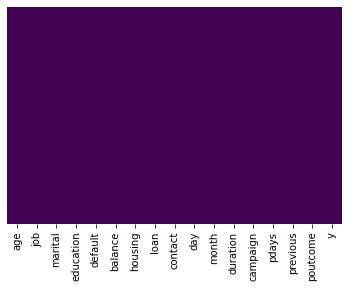

In [33]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

<h2><font color = 'green'><center>EXPLORATORY DATA ANALYSIS</center></font></h2>

### 1. Checking if there is association between age and output variable.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Age vs Subscription')

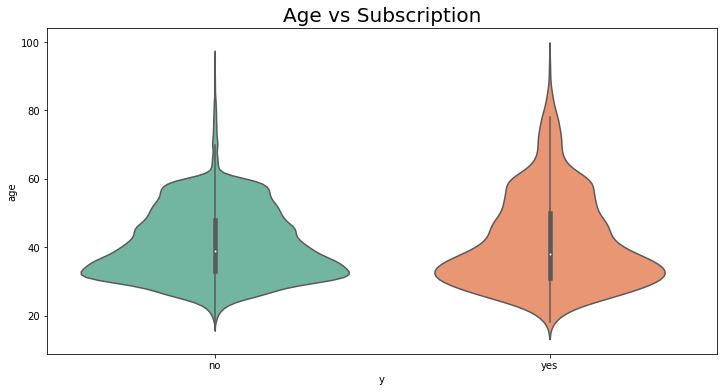

In [52]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="y",y="age",data=df,palette = 'Set2')
plt.title("Age vs Subscription", fontsize=20)

__Result__: Clients who buy the policy are more likely to fall between the age of 20-40. Also there are more number of clients beyond age of 60 who have bought the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Marital Status vs Subscription')

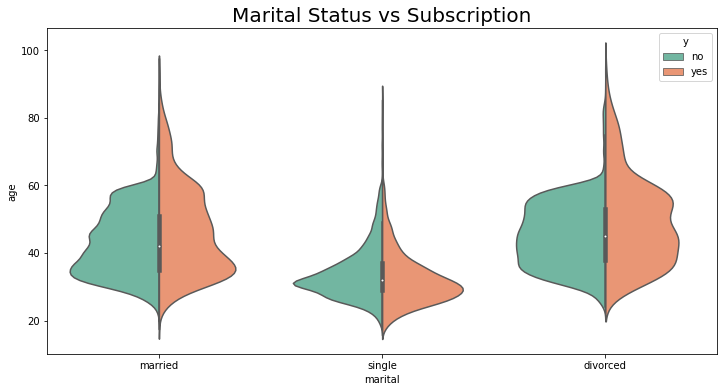

In [117]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="marital",y = 'age',hue = 'y',data=df,palette = 'Set2',split = True)
plt.title("Marital Status vs Subscription", fontsize=20)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Job vs Subscription according to Age')

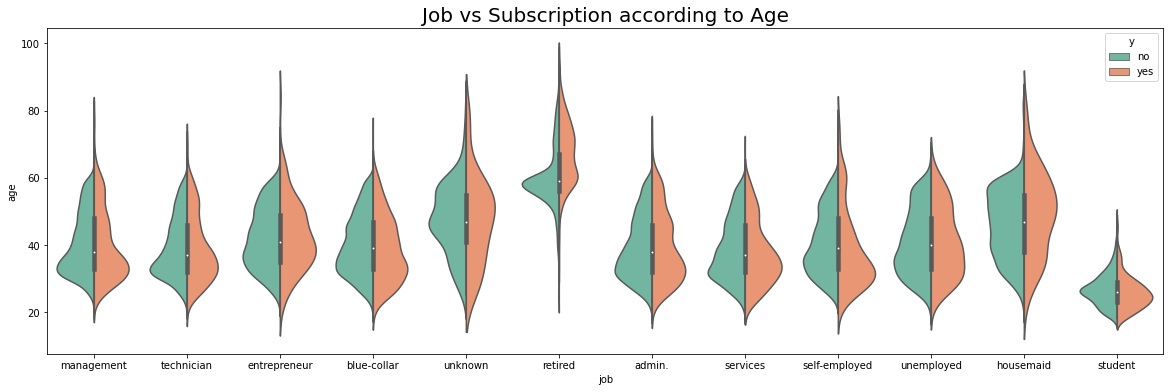

In [121]:
fig = plt.figure(figsize=(20,6))
sns.violinplot(x="job",y = 'age',hue = 'y',data=df,palette = 'Set2',split = True)
plt.title("Job vs Subscription according to Age", fontsize=20)

__Result__: Retired clients are more likelyt to buy the policy as ther is an approximate uniform distribution.

#### Association between Job and Subscription

In [61]:
agg_job = df.groupby(['job', 'y'])['age'].count().unstack().fillna(0)
agg_job

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Job Type vs Subscription')

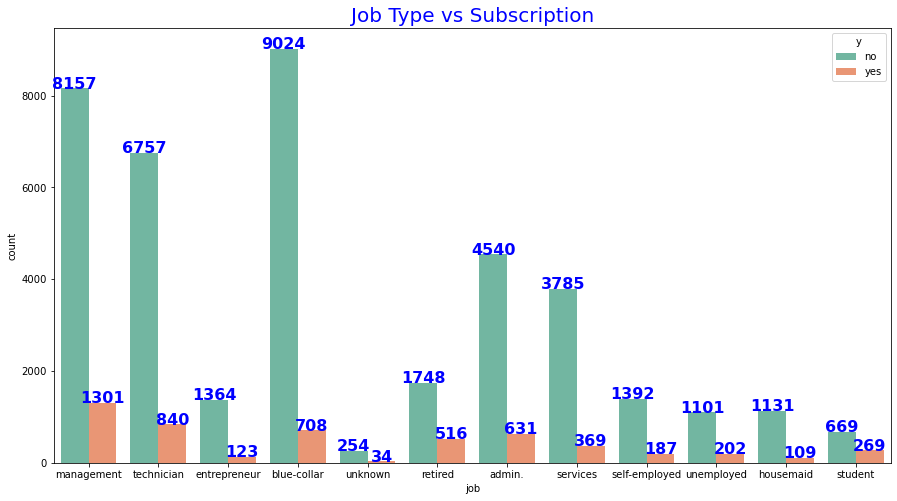

In [96]:
fig = plt.figure(figsize = (15,8))
b = sns.countplot(x = 'job',hue = 'y',data = df,palette = 'Set2')

b.set_xticklabels(b.get_xticklabels(),rotation=0)
for p in b.patches:
    height = p.get_height()
    b.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)

b.set_title('Job Type vs Subscription',fontsize = 20,color = 'b')

Clients who have their job description as management are more likely to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Defaulters vs Subscription')

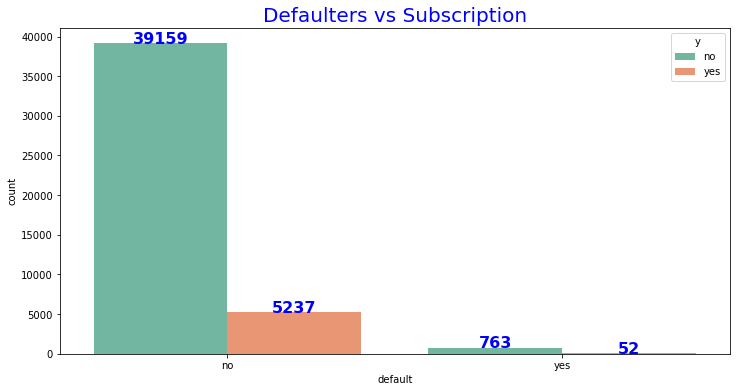

In [97]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'default',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Defaulters vs Subscription',fontsize = 20,color = 'b')

__Result__: Clients whose do not have default as their status are more likely to buy the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Housing vs Subscription')

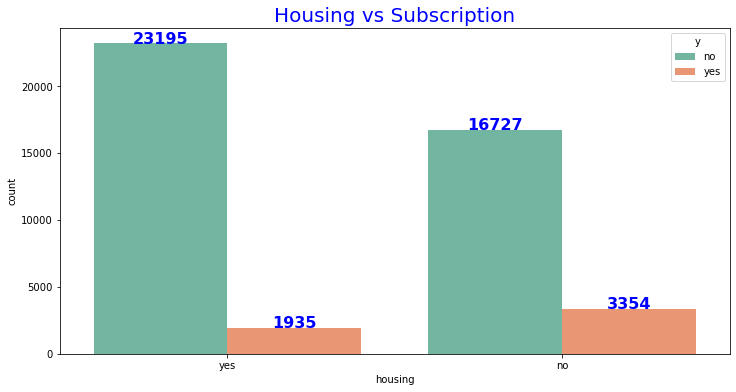

In [98]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'housing',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Housing vs Subscription',fontsize = 20,color = 'b')

__Result__: Irrespective of their housing loan status there is a small diffrence(26%) between clients who have and not have housing loan and yet apply for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Personal Loan vs Subscription')

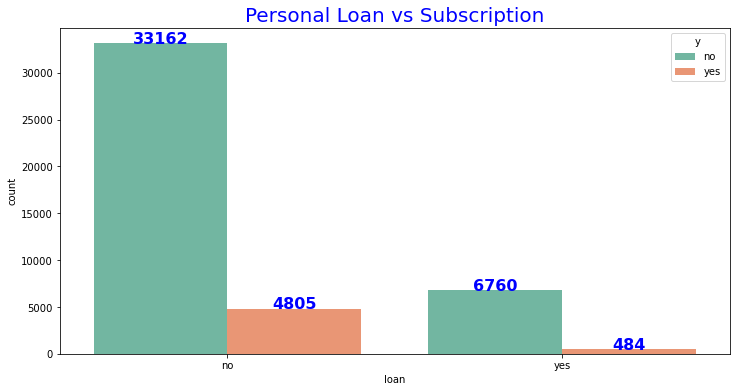

In [101]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'loan',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Personal Loan vs Subscription',fontsize = 20,color = 'b')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Education vs Subscription')

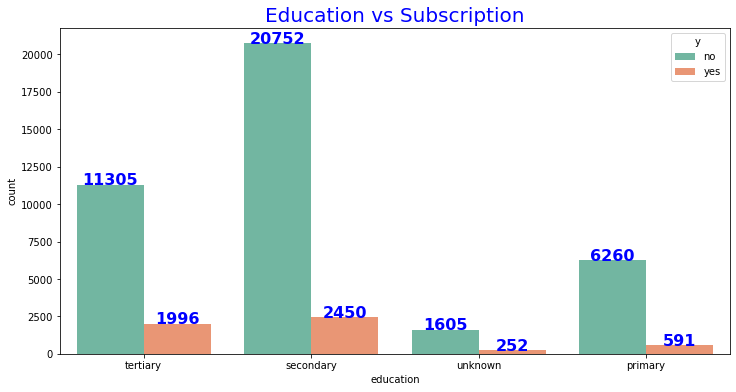

In [102]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'education',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Education vs Subscription',fontsize = 20,color = 'b')

__Result__: Clients with secondary and tertiary education are more likely to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Contact vs Subscription')

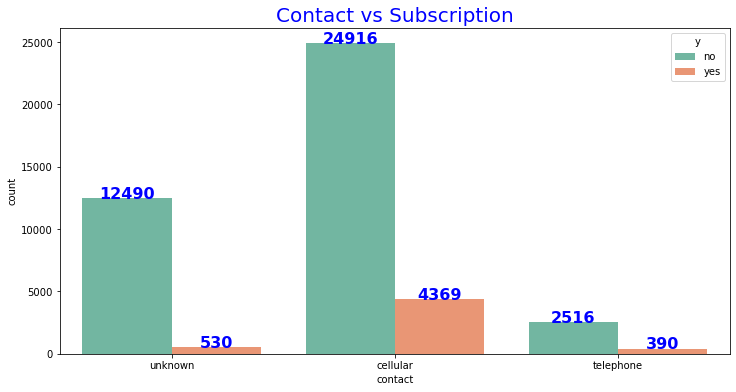

In [103]:
fig = plt.figure(figsize = (12,6))
a = sns.countplot(x = 'contact',hue = 'y',data = df,palette = 'Set2')

a.set_xticklabels(a.get_xticklabels(),rotation=0)
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",color='b',weight='bold',size=16)
a.set_title('Contact vs Subscription',fontsize = 20,color = 'b')

__Result__: Cellular contact has a higher rate of subscription.

### Average duration the call lasting

In [23]:
mean_y = df[df['y'] == 'yes']['duration'].median()
mean_n = df[df['y'] == 'no']['duration'].median()

print(' Mean Duration where clients opt for policy:',mean_y,'\n','Mean Duration where clients do not opt for policy:',mean_n)

 Mean Duration where clients opt for policy: 426.0 
 Mean Duration where clients do not opt for policy: 164.0


__Result__: On average if the call lasts for 426 seconds for the clients who opted for the policy and for clients who did not opt for policy the call lasted for 164 seconds which is lesser than clients who opt for policy. Thus clients spend more time on communication when they opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

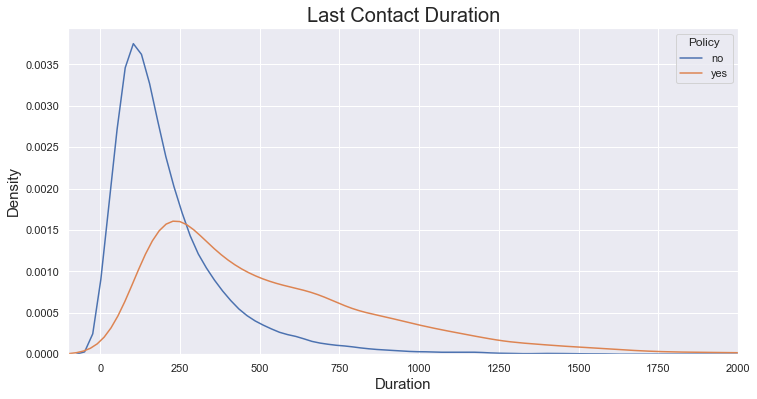

In [46]:
fig = plt.figure(figsize=(12,6))
sns.kdeplot(df.loc[df['y'] == 'no', 'duration'], label = 'no')
sns.kdeplot(df.loc[df['y'] == 'yes', 'duration'], label = 'yes');
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Last Contact Duration',fontsize=20);
plt.xlim(-100,2000)
plt.legend(title = 'Policy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of Contacts Performed before this Campaign and Subscription')

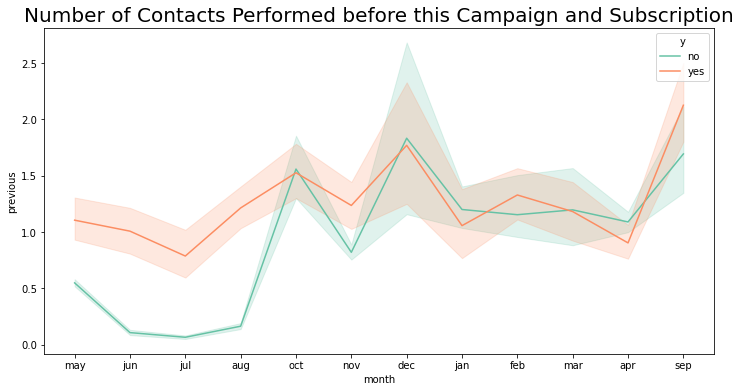

In [113]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = 'month',y = 'previous',hue = 'y',palette = 'Set2')
plt.title('Number of Contacts Performed before this Campaign and Subscription',fontsize = 20)

__Result__ : Clients are more likely to opt for policy from the month of May to October also in the month of September. Thus contact before the campaign brings more clients to opt for the policy.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Number of Contacts Performed before during the Campaign and Subscription')

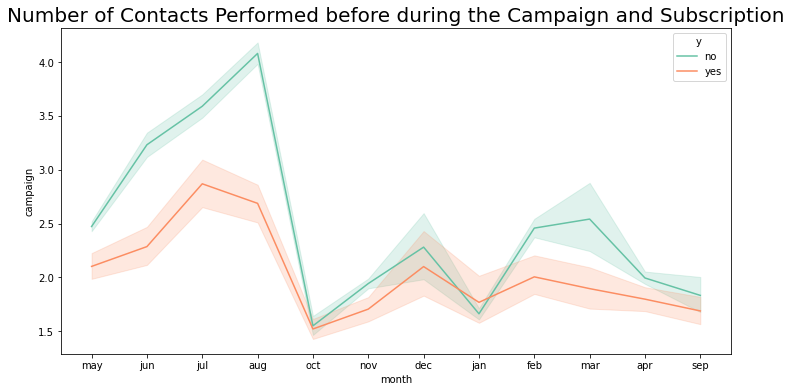

In [112]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df, x = 'month',y = 'campaign',hue = 'y',palette = 'Set2')
plt.title('Number of Contacts Performed before during the Campaign and Subscription',fontsize = 20)

<h2><font color = 'green'><center>FINAL RECOMMENDATION</center></font></h2>

<ol>
    <li>Clients who buy the policy are more likely to fall between the age of 20-40. Also there are more number of clients beyond age of 60 who have opted for the policy.</li>
    <li>Retired clients are more likely to buy the policy.</li>
    <li>Clients who have their job description as management are more likely to opt for the policy.</li>
    <li>Clients whose do not have default as their status are more likely to buy the policy.</li>
    <li>Irrespective of the housing loan status there is a small difference(26%) between clients who have and not have housing loan and yet apply for the policy.</li>
    <li>Clients with secondary and tertiary education are more likely to opt for the policy.</li>
    <li> Cellular contact has a higher rate of subscription.</li>
    <li>On average the call lasts for 426 seconds for the clients who opted for the policy and for clients who did not opt for policy the call lasted for 164 seconds which is lesser than clients who opt for policy. Thus clients spend more time on communication when they opt for the policy.</li>
    <li>Clients are more likely to opt for policy from the month of May to October also in the month of September. Thus contact before the campaign brings more clients to opt for the policy.</li>
</ol>
